<a href="https://colab.research.google.com/github/lauraosede/CE888/blob/main/Lab_7/Copy_of_Exercise_3_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)

# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [3]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Using word-embeddings 

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Training the model with Embedding and SimpleRNN layers

In [8]:
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN

model = keras.models.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 29s 175ms/step - loss: 0.6639 - acc: 0.5786 - val_loss: 0.4405 - val_acc: 0.8098
Epoch 2/10
157/157 [==============================] - 27s 172ms/step - loss: 0.4101 - acc: 0.8268 - val_loss: 0.4755 - val_acc: 0.8044
Epoch 3/10
157/157 [==============================] - 27s 174ms/step - loss: 0.2970 - acc: 0.8828 - val_loss: 

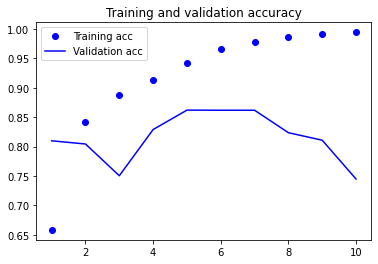

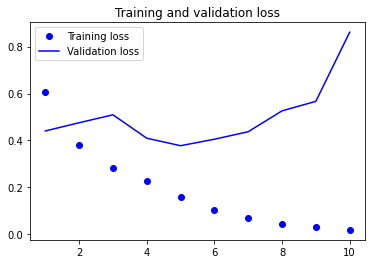

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Training the model with Embedding and SimpleRNN layers

In [11]:
from keras.layers import LSTM

model = keras.models.Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 61s 374ms/step - loss: 0.6012 - acc: 0.6862 - val_loss: 0.3596 - val_acc: 0.8528
Epoch 2/10
157/157 [==============================] - 64s 409ms/step - loss: 0.3138 - acc: 0.8770 - val_loss: 0.3046 - val_acc: 0.8748
Epoch 3/10
157/157 [==============================] - 64s 407ms/step - loss: 0.2384 - acc: 0.9114 - val_loss: 0.3515 - val_acc: 0.8622
Epoch 4/10
157/157 [==============================] - 64s 410ms/step - loss: 0.1996 - acc: 0.9277 - val_loss: 0.2925 - val_acc: 0.8792
Epoch 5/10
157/157 [==============================] - 63s 402ms/step - loss: 0.1698 - acc: 0.9385 - val_loss: 0.2984 - val_acc: 0.8784
Epoch 6/10
157/157 [==============================] - 63s 401ms/step - loss: 0.1514 - acc: 0.9485 - val_loss: 0.3271 - val_acc: 0.8864
Epoch 7/10
157/157 [==============================] - 64s 407ms/step - loss: 0.1313 - acc: 0.9542 - val_loss: 0.3135 - val_acc: 0.8870
Epoch 8/10
157/157 [==============================] - 6

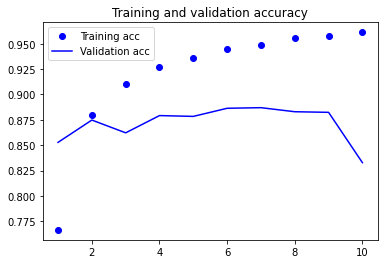

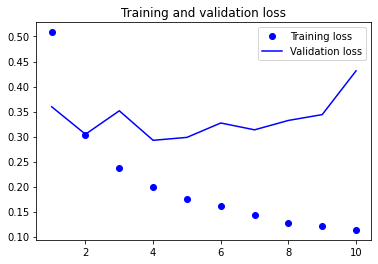

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Task 3: 

Please consider this Time Series Prediction with LSTM Recurrent Neural Networks. We can see that the LSTM model in the code below has an average error of about 23 passengers (in thousands) on the training dataset, and about 53 passengers (in thousands) on the test dataset. Not that bad. Can you please improve the performance?

#### Dataset Discription
The problem we are going to look at in this post is the International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.



Epoch 1/100
94/94 - 2s - loss: 0.0224
Epoch 2/100
94/94 - 0s - loss: 0.0102
Epoch 3/100
94/94 - 0s - loss: 0.0085
Epoch 4/100
94/94 - 0s - loss: 0.0077
Epoch 5/100
94/94 - 0s - loss: 0.0069
Epoch 6/100
94/94 - 0s - loss: 0.0060
Epoch 7/100
94/94 - 0s - loss: 0.0053
Epoch 8/100
94/94 - 0s - loss: 0.0046
Epoch 9/100
94/94 - 0s - loss: 0.0041
Epoch 10/100
94/94 - 0s - loss: 0.0035
Epoch 11/100
94/94 - 0s - loss: 0.0031
Epoch 12/100
94/94 - 0s - loss: 0.0028
Epoch 13/100
94/94 - 0s - loss: 0.0025
Epoch 14/100
94/94 - 0s - loss: 0.0023
Epoch 15/100
94/94 - 0s - loss: 0.0022
Epoch 16/100
94/94 - 0s - loss: 0.0021
Epoch 17/100
94/94 - 0s - loss: 0.0021
Epoch 18/100
94/94 - 0s - loss: 0.0021
Epoch 19/100
94/94 - 0s - loss: 0.0021
Epoch 20/100
94/94 - 0s - loss: 0.0020
Epoch 21/100
94/94 - 0s - loss: 0.0021
Epoch 22/100
94/94 - 0s - loss: 0.0020
Epoch 23/100
94/94 - 0s - loss: 0.0020
Epoch 24/100
94/94 - 0s - loss: 0.0020
Epoch 25/100
94/94 - 0s - loss: 0.0020
Epoch 26/100
94/94 - 0s - loss: 0.

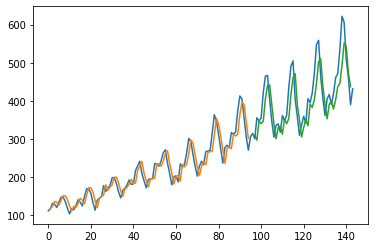

In [36]:
import numpy
import math
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Improving accuracy in LSTM model 

### Tuning the Number of Epochs

To improvee LSTM for time series prediction, we will focus on parameter tuning to see which works best with our model. the first parameter we will tune is the number of training epochs. 

This model has been reconfigured to use a batch size of 4, and a single neuron. 

We will explore the effect of training this configuration for different numbers of training epochs

#### Diagnostic of 500 Epochs

Epoch 1/500
24/24 - 2s - loss: 0.0679
Epoch 2/500
24/24 - 0s - loss: 0.0574
Epoch 3/500
24/24 - 0s - loss: 0.0489
Epoch 4/500
24/24 - 0s - loss: 0.0419
Epoch 5/500
24/24 - 0s - loss: 0.0366
Epoch 6/500
24/24 - 0s - loss: 0.0323
Epoch 7/500
24/24 - 0s - loss: 0.0290
Epoch 8/500
24/24 - 0s - loss: 0.0266
Epoch 9/500
24/24 - 0s - loss: 0.0247
Epoch 10/500
24/24 - 0s - loss: 0.0233
Epoch 11/500
24/24 - 0s - loss: 0.0222
Epoch 12/500
24/24 - 0s - loss: 0.0215
Epoch 13/500
24/24 - 0s - loss: 0.0209
Epoch 14/500
24/24 - 0s - loss: 0.0204
Epoch 15/500
24/24 - 0s - loss: 0.0201
Epoch 16/500
24/24 - 0s - loss: 0.0199
Epoch 17/500
24/24 - 0s - loss: 0.0197
Epoch 18/500
24/24 - 0s - loss: 0.0196
Epoch 19/500
24/24 - 0s - loss: 0.0194
Epoch 20/500
24/24 - 0s - loss: 0.0194
Epoch 21/500
24/24 - 0s - loss: 0.0193
Epoch 22/500
24/24 - 0s - loss: 0.0192
Epoch 23/500
24/24 - 0s - loss: 0.0192
Epoch 24/500
24/24 - 0s - loss: 0.0191
Epoch 25/500
24/24 - 0s - loss: 0.0190
Epoch 26/500
24/24 - 0s - loss: 0.

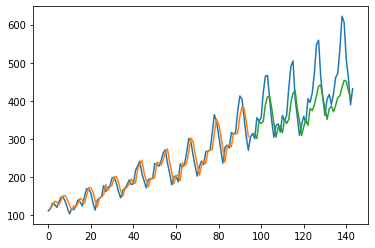

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=4, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The RMSE for the train and test score is higher than what we began with. This could be as a result of changing the number of neurons, batch size or epoch. We will test on some other epoch keeping the neuron value and batch size constant. 

#### Diagnostic of 1000 Epochs

Epoch 1/1000
24/24 - 3s - loss: 0.0350
Epoch 2/1000
24/24 - 0s - loss: 0.0268
Epoch 3/1000
24/24 - 0s - loss: 0.0206
Epoch 4/1000
24/24 - 0s - loss: 0.0167
Epoch 5/1000
24/24 - 0s - loss: 0.0141
Epoch 6/1000
24/24 - 0s - loss: 0.0127
Epoch 7/1000
24/24 - 0s - loss: 0.0118
Epoch 8/1000
24/24 - 0s - loss: 0.0112
Epoch 9/1000
24/24 - 0s - loss: 0.0109
Epoch 10/1000
24/24 - 0s - loss: 0.0106
Epoch 11/1000
24/24 - 0s - loss: 0.0103
Epoch 12/1000
24/24 - 0s - loss: 0.0101
Epoch 13/1000
24/24 - 0s - loss: 0.0098
Epoch 14/1000
24/24 - 0s - loss: 0.0095
Epoch 15/1000
24/24 - 0s - loss: 0.0092
Epoch 16/1000
24/24 - 0s - loss: 0.0089
Epoch 17/1000
24/24 - 0s - loss: 0.0086
Epoch 18/1000
24/24 - 0s - loss: 0.0083
Epoch 19/1000
24/24 - 0s - loss: 0.0080
Epoch 20/1000
24/24 - 0s - loss: 0.0077
Epoch 21/1000
24/24 - 0s - loss: 0.0074
Epoch 22/1000
24/24 - 0s - loss: 0.0071
Epoch 23/1000
24/24 - 0s - loss: 0.0068
Epoch 24/1000
24/24 - 0s - loss: 0.0066
Epoch 25/1000
24/24 - 0s - loss: 0.0062
Epoch 26/

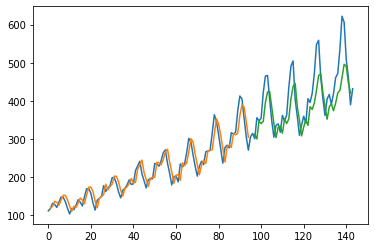

In [18]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=4, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### Diagnostic of 2000 Epochs

Epoch 1/2000
24/24 - 2s - loss: 0.0648
Epoch 2/2000
24/24 - 0s - loss: 0.0542
Epoch 3/2000
24/24 - 0s - loss: 0.0458
Epoch 4/2000
24/24 - 0s - loss: 0.0392
Epoch 5/2000
24/24 - 0s - loss: 0.0341
Epoch 6/2000
24/24 - 0s - loss: 0.0300
Epoch 7/2000
24/24 - 0s - loss: 0.0271
Epoch 8/2000
24/24 - 0s - loss: 0.0248
Epoch 9/2000
24/24 - 0s - loss: 0.0231
Epoch 10/2000
24/24 - 0s - loss: 0.0222
Epoch 11/2000
24/24 - 0s - loss: 0.0212
Epoch 12/2000
24/24 - 0s - loss: 0.0207
Epoch 13/2000
24/24 - 0s - loss: 0.0203
Epoch 14/2000
24/24 - 0s - loss: 0.0200
Epoch 15/2000
24/24 - 0s - loss: 0.0198
Epoch 16/2000
24/24 - 0s - loss: 0.0196
Epoch 17/2000
24/24 - 0s - loss: 0.0195
Epoch 18/2000
24/24 - 0s - loss: 0.0194
Epoch 19/2000
24/24 - 0s - loss: 0.0194
Epoch 20/2000
24/24 - 0s - loss: 0.0193
Epoch 21/2000
24/24 - 0s - loss: 0.0193
Epoch 22/2000
24/24 - 0s - loss: 0.0192
Epoch 23/2000
24/24 - 0s - loss: 0.0192
Epoch 24/2000
24/24 - 0s - loss: 0.0191
Epoch 25/2000
24/24 - 0s - loss: 0.0191
Epoch 26/

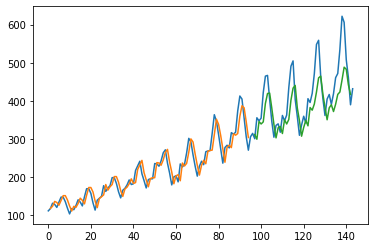

In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=2000, batch_size=4, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The value of our RMSE score for our test data increased in this diagnostic, but did best with an epoch of 100, so we will keep this epoch score and fine-tune other parameters

### Tuning the Batch Size

#### Diagnostic of 1000 Epochs and batch size of 2

Epoch 1/1000
47/47 - 2s - loss: 0.0668
Epoch 2/1000
47/47 - 0s - loss: 0.0479
Epoch 3/1000
47/47 - 0s - loss: 0.0364
Epoch 4/1000
47/47 - 0s - loss: 0.0296
Epoch 5/1000
47/47 - 0s - loss: 0.0256
Epoch 6/1000
47/47 - 0s - loss: 0.0234
Epoch 7/1000
47/47 - 0s - loss: 0.0222
Epoch 8/1000
47/47 - 0s - loss: 0.0215
Epoch 9/1000
47/47 - 0s - loss: 0.0211
Epoch 10/1000
47/47 - 0s - loss: 0.0209
Epoch 11/1000
47/47 - 0s - loss: 0.0207
Epoch 12/1000
47/47 - 0s - loss: 0.0205
Epoch 13/1000
47/47 - 0s - loss: 0.0205
Epoch 14/1000
47/47 - 0s - loss: 0.0203
Epoch 15/1000
47/47 - 0s - loss: 0.0201
Epoch 16/1000
47/47 - 0s - loss: 0.0200
Epoch 17/1000
47/47 - 0s - loss: 0.0200
Epoch 18/1000
47/47 - 0s - loss: 0.0198
Epoch 19/1000
47/47 - 0s - loss: 0.0198
Epoch 20/1000
47/47 - 0s - loss: 0.0197
Epoch 21/1000
47/47 - 0s - loss: 0.0196
Epoch 22/1000
47/47 - 0s - loss: 0.0195
Epoch 23/1000
47/47 - 0s - loss: 0.0195
Epoch 24/1000
47/47 - 0s - loss: 0.0194
Epoch 25/1000
47/47 - 0s - loss: 0.0193
Epoch 26/

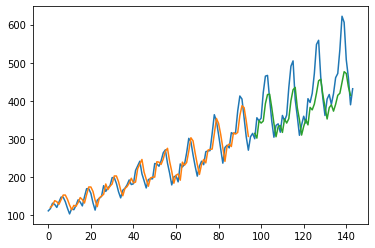

In [20]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=2, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### Diagnostic of 1000 Epochs and batch size of 3

Epoch 1/1000
32/32 - 2s - loss: 0.0772
Epoch 2/1000
32/32 - 0s - loss: 0.0620
Epoch 3/1000
32/32 - 0s - loss: 0.0502
Epoch 4/1000
32/32 - 0s - loss: 0.0416
Epoch 5/1000
32/32 - 0s - loss: 0.0354
Epoch 6/1000
32/32 - 0s - loss: 0.0310
Epoch 7/1000
32/32 - 0s - loss: 0.0281
Epoch 8/1000
32/32 - 0s - loss: 0.0260
Epoch 9/1000
32/32 - 0s - loss: 0.0246
Epoch 10/1000
32/32 - 0s - loss: 0.0237
Epoch 11/1000
32/32 - 0s - loss: 0.0229
Epoch 12/1000
32/32 - 0s - loss: 0.0224
Epoch 13/1000
32/32 - 0s - loss: 0.0220
Epoch 14/1000
32/32 - 0s - loss: 0.0218
Epoch 15/1000
32/32 - 0s - loss: 0.0216
Epoch 16/1000
32/32 - 0s - loss: 0.0214
Epoch 17/1000
32/32 - 0s - loss: 0.0213
Epoch 18/1000
32/32 - 0s - loss: 0.0211
Epoch 19/1000
32/32 - 0s - loss: 0.0210
Epoch 20/1000
32/32 - 0s - loss: 0.0209
Epoch 21/1000
32/32 - 0s - loss: 0.0208
Epoch 22/1000
32/32 - 0s - loss: 0.0207
Epoch 23/1000
32/32 - 0s - loss: 0.0206
Epoch 24/1000
32/32 - 0s - loss: 0.0205
Epoch 25/1000
32/32 - 0s - loss: 0.0204
Epoch 26/

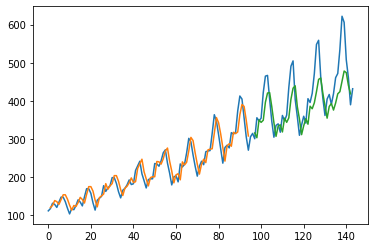

In [25]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=3, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### Diagnostic of 1000 Epochs and batch size of 4

Epoch 1/1000
24/24 - 2s - loss: 0.1149
Epoch 2/1000
24/24 - 0s - loss: 0.0951
Epoch 3/1000
24/24 - 0s - loss: 0.0795
Epoch 4/1000
24/24 - 0s - loss: 0.0664
Epoch 5/1000
24/24 - 0s - loss: 0.0572
Epoch 6/1000
24/24 - 0s - loss: 0.0496
Epoch 7/1000
24/24 - 0s - loss: 0.0437
Epoch 8/1000
24/24 - 0s - loss: 0.0393
Epoch 9/1000
24/24 - 0s - loss: 0.0363
Epoch 10/1000
24/24 - 0s - loss: 0.0338
Epoch 11/1000
24/24 - 0s - loss: 0.0320
Epoch 12/1000
24/24 - 0s - loss: 0.0308
Epoch 13/1000
24/24 - 0s - loss: 0.0297
Epoch 14/1000
24/24 - 0s - loss: 0.0289
Epoch 15/1000
24/24 - 0s - loss: 0.0284
Epoch 16/1000
24/24 - 0s - loss: 0.0279
Epoch 17/1000
24/24 - 0s - loss: 0.0274
Epoch 18/1000
24/24 - 0s - loss: 0.0270
Epoch 19/1000
24/24 - 0s - loss: 0.0267
Epoch 20/1000
24/24 - 0s - loss: 0.0264
Epoch 21/1000
24/24 - 0s - loss: 0.0261
Epoch 22/1000
24/24 - 0s - loss: 0.0258
Epoch 23/1000
24/24 - 0s - loss: 0.0256
Epoch 24/1000
24/24 - 0s - loss: 0.0253
Epoch 25/1000
24/24 - 0s - loss: 0.0251
Epoch 26/

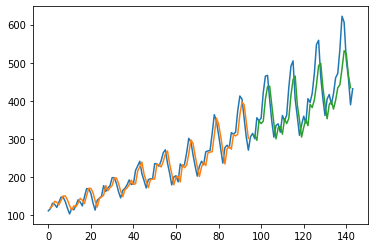

In [47]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=4, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Fine-tuning our model to 1000 Epoch, and batch size of 4 with 1 neouron gives us a lower RMSE score than what we started with, with :
Train score : 22.81 RMSE
Test score: 51.27 RMSE

#### Diagnostic of 1000 Epochs and batch size of 5

Epoch 1/1000
19/19 - 2s - loss: 0.0579
Epoch 2/1000
19/19 - 0s - loss: 0.0506
Epoch 3/1000
19/19 - 0s - loss: 0.0438
Epoch 4/1000
19/19 - 0s - loss: 0.0383
Epoch 5/1000
19/19 - 0s - loss: 0.0335
Epoch 6/1000
19/19 - 0s - loss: 0.0294
Epoch 7/1000
19/19 - 0s - loss: 0.0263
Epoch 8/1000
19/19 - 0s - loss: 0.0235
Epoch 9/1000
19/19 - 0s - loss: 0.0213
Epoch 10/1000
19/19 - 0s - loss: 0.0197
Epoch 11/1000
19/19 - 0s - loss: 0.0184
Epoch 12/1000
19/19 - 0s - loss: 0.0176
Epoch 13/1000
19/19 - 0s - loss: 0.0168
Epoch 14/1000
19/19 - 0s - loss: 0.0163
Epoch 15/1000
19/19 - 0s - loss: 0.0159
Epoch 16/1000
19/19 - 0s - loss: 0.0156
Epoch 17/1000
19/19 - 0s - loss: 0.0154
Epoch 18/1000
19/19 - 0s - loss: 0.0151
Epoch 19/1000
19/19 - 0s - loss: 0.0150
Epoch 20/1000
19/19 - 0s - loss: 0.0148
Epoch 21/1000
19/19 - 0s - loss: 0.0146
Epoch 22/1000
19/19 - 0s - loss: 0.0145
Epoch 23/1000
19/19 - 0s - loss: 0.0143
Epoch 24/1000
19/19 - 0s - loss: 0.0141
Epoch 25/1000
19/19 - 0s - loss: 0.0140
Epoch 26/

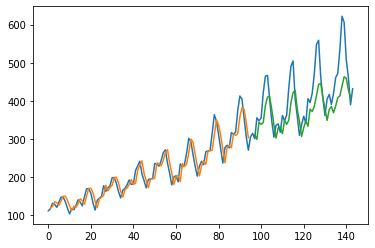

In [27]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=5, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

As with training epochs, we can objectively compare the performance of the network given different batch sizes. From the  performance alone, the results shows a better RMSE score with batch size of 4. So, for our next diagnostic, we will try and fine-tune neurons with batch size 4 and 1000 epoch to see if RMSE score further decreases. 

### Tuning the Number of Neurons

#### Diagnostic of 1000 Epochs,batch size of 4 and neuron of 2

Epoch 1/1000
24/24 - 2s - loss: 0.0783
Epoch 2/1000
24/24 - 0s - loss: 0.0644
Epoch 3/1000
24/24 - 0s - loss: 0.0534
Epoch 4/1000
24/24 - 0s - loss: 0.0448
Epoch 5/1000
24/24 - 0s - loss: 0.0381
Epoch 6/1000
24/24 - 0s - loss: 0.0331
Epoch 7/1000
24/24 - 0s - loss: 0.0292
Epoch 8/1000
24/24 - 0s - loss: 0.0264
Epoch 9/1000
24/24 - 0s - loss: 0.0245
Epoch 10/1000
24/24 - 0s - loss: 0.0231
Epoch 11/1000
24/24 - 0s - loss: 0.0221
Epoch 12/1000
24/24 - 0s - loss: 0.0215
Epoch 13/1000
24/24 - 0s - loss: 0.0211
Epoch 14/1000
24/24 - 0s - loss: 0.0208
Epoch 15/1000
24/24 - 0s - loss: 0.0204
Epoch 16/1000
24/24 - 0s - loss: 0.0201
Epoch 17/1000
24/24 - 0s - loss: 0.0199
Epoch 18/1000
24/24 - 0s - loss: 0.0197
Epoch 19/1000
24/24 - 0s - loss: 0.0194
Epoch 20/1000
24/24 - 0s - loss: 0.0192
Epoch 21/1000
24/24 - 0s - loss: 0.0189
Epoch 22/1000
24/24 - 0s - loss: 0.0186
Epoch 23/1000
24/24 - 0s - loss: 0.0184
Epoch 24/1000
24/24 - 0s - loss: 0.0181
Epoch 25/1000
24/24 - 0s - loss: 0.0179
Epoch 26/

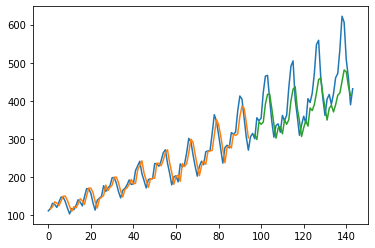

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(2, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=4, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

As with training epochs, we can objectively compare the performance of the network given different batch sizes.

#### Diagnostic of 1000 Epochs,batch size of 4 and neuron of 3

Epoch 1/1000
24/24 - 2s - loss: 0.0614
Epoch 2/1000
24/24 - 0s - loss: 0.0489
Epoch 3/1000
24/24 - 0s - loss: 0.0389
Epoch 4/1000
24/24 - 0s - loss: 0.0312
Epoch 5/1000
24/24 - 0s - loss: 0.0258
Epoch 6/1000
24/24 - 0s - loss: 0.0220
Epoch 7/1000
24/24 - 0s - loss: 0.0195
Epoch 8/1000
24/24 - 0s - loss: 0.0179
Epoch 9/1000
24/24 - 0s - loss: 0.0169
Epoch 10/1000
24/24 - 0s - loss: 0.0163
Epoch 11/1000
24/24 - 0s - loss: 0.0159
Epoch 12/1000
24/24 - 0s - loss: 0.0154
Epoch 13/1000
24/24 - 0s - loss: 0.0151
Epoch 14/1000
24/24 - 0s - loss: 0.0148
Epoch 15/1000
24/24 - 0s - loss: 0.0145
Epoch 16/1000
24/24 - 0s - loss: 0.0141
Epoch 17/1000
24/24 - 0s - loss: 0.0138
Epoch 18/1000
24/24 - 0s - loss: 0.0135
Epoch 19/1000
24/24 - 0s - loss: 0.0131
Epoch 20/1000
24/24 - 0s - loss: 0.0128
Epoch 21/1000
24/24 - 0s - loss: 0.0124
Epoch 22/1000
24/24 - 0s - loss: 0.0120
Epoch 23/1000
24/24 - 0s - loss: 0.0116
Epoch 24/1000
24/24 - 0s - loss: 0.0113
Epoch 25/1000
24/24 - 0s - loss: 0.0109
Epoch 26/

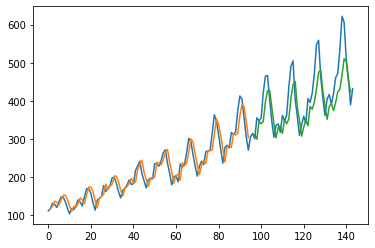

In [34]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(3, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=4, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### Diagnostic of 1000 Epochs,batch size of 4 and neuron of 4

Epoch 1/1000
24/24 - 3s - loss: 0.0531
Epoch 2/1000
24/24 - 0s - loss: 0.0422
Epoch 3/1000
24/24 - 0s - loss: 0.0336
Epoch 4/1000
24/24 - 0s - loss: 0.0270
Epoch 5/1000
24/24 - 0s - loss: 0.0219
Epoch 6/1000
24/24 - 0s - loss: 0.0186
Epoch 7/1000
24/24 - 0s - loss: 0.0164
Epoch 8/1000
24/24 - 0s - loss: 0.0149
Epoch 9/1000
24/24 - 0s - loss: 0.0141
Epoch 10/1000
24/24 - 0s - loss: 0.0136
Epoch 11/1000
24/24 - 0s - loss: 0.0132
Epoch 12/1000
24/24 - 0s - loss: 0.0129
Epoch 13/1000
24/24 - 0s - loss: 0.0125
Epoch 14/1000
24/24 - 0s - loss: 0.0122
Epoch 15/1000
24/24 - 0s - loss: 0.0119
Epoch 16/1000
24/24 - 0s - loss: 0.0116
Epoch 17/1000
24/24 - 0s - loss: 0.0112
Epoch 18/1000
24/24 - 0s - loss: 0.0109
Epoch 19/1000
24/24 - 0s - loss: 0.0105
Epoch 20/1000
24/24 - 0s - loss: 0.0102
Epoch 21/1000
24/24 - 0s - loss: 0.0098
Epoch 22/1000
24/24 - 0s - loss: 0.0094
Epoch 23/1000
24/24 - 0s - loss: 0.0090
Epoch 24/1000
24/24 - 0s - loss: 0.0087
Epoch 25/1000
24/24 - 0s - loss: 0.0082
Epoch 26/

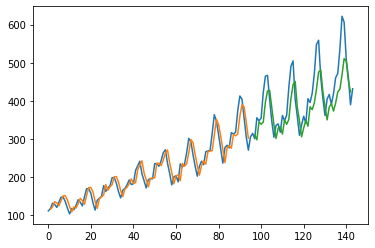

In [33]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=4, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

As with training epochs, we can objectively compare the performance of the network given different batch sizes.

#### Diagnostic of 1000 Epochs,batch size of 4 and neuron of 5

Epoch 1/1000
24/24 - 2s - loss: 0.0542
Epoch 2/1000
24/24 - 0s - loss: 0.0398
Epoch 3/1000
24/24 - 0s - loss: 0.0293
Epoch 4/1000
24/24 - 0s - loss: 0.0222
Epoch 5/1000
24/24 - 0s - loss: 0.0177
Epoch 6/1000
24/24 - 0s - loss: 0.0152
Epoch 7/1000
24/24 - 0s - loss: 0.0139
Epoch 8/1000
24/24 - 0s - loss: 0.0131
Epoch 9/1000
24/24 - 0s - loss: 0.0126
Epoch 10/1000
24/24 - 0s - loss: 0.0122
Epoch 11/1000
24/24 - 0s - loss: 0.0118
Epoch 12/1000
24/24 - 0s - loss: 0.0113
Epoch 13/1000
24/24 - 0s - loss: 0.0110
Epoch 14/1000
24/24 - 0s - loss: 0.0105
Epoch 15/1000
24/24 - 0s - loss: 0.0101
Epoch 16/1000
24/24 - 0s - loss: 0.0097
Epoch 17/1000
24/24 - 0s - loss: 0.0092
Epoch 18/1000
24/24 - 0s - loss: 0.0088
Epoch 19/1000
24/24 - 0s - loss: 0.0084
Epoch 20/1000
24/24 - 0s - loss: 0.0080
Epoch 21/1000
24/24 - 0s - loss: 0.0076
Epoch 22/1000
24/24 - 0s - loss: 0.0072
Epoch 23/1000
24/24 - 0s - loss: 0.0068
Epoch 24/1000
24/24 - 0s - loss: 0.0064
Epoch 25/1000
24/24 - 0s - loss: 0.0060
Epoch 26/

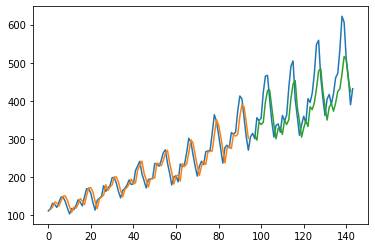

In [35]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=4, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### Diagnostic of 100 Epochs, neouron of 5 and batch size of 4

Epoch 1/100
24/24 - 3s - loss: 0.0537
Epoch 2/100
24/24 - 0s - loss: 0.0376
Epoch 3/100
24/24 - 0s - loss: 0.0268
Epoch 4/100
24/24 - 0s - loss: 0.0203
Epoch 5/100
24/24 - 0s - loss: 0.0163
Epoch 6/100
24/24 - 0s - loss: 0.0144
Epoch 7/100
24/24 - 0s - loss: 0.0133
Epoch 8/100
24/24 - 0s - loss: 0.0128
Epoch 9/100
24/24 - 0s - loss: 0.0123
Epoch 10/100
24/24 - 0s - loss: 0.0118
Epoch 11/100
24/24 - 0s - loss: 0.0113
Epoch 12/100
24/24 - 0s - loss: 0.0109
Epoch 13/100
24/24 - 0s - loss: 0.0104
Epoch 14/100
24/24 - 0s - loss: 0.0099
Epoch 15/100
24/24 - 0s - loss: 0.0095
Epoch 16/100
24/24 - 0s - loss: 0.0090
Epoch 17/100
24/24 - 0s - loss: 0.0086
Epoch 18/100
24/24 - 0s - loss: 0.0081
Epoch 19/100
24/24 - 0s - loss: 0.0077
Epoch 20/100
24/24 - 0s - loss: 0.0073
Epoch 21/100
24/24 - 0s - loss: 0.0069
Epoch 22/100
24/24 - 0s - loss: 0.0064
Epoch 23/100
24/24 - 0s - loss: 0.0060
Epoch 24/100
24/24 - 0s - loss: 0.0056
Epoch 25/100
24/24 - 0s - loss: 0.0053
Epoch 26/100
24/24 - 0s - loss: 0.

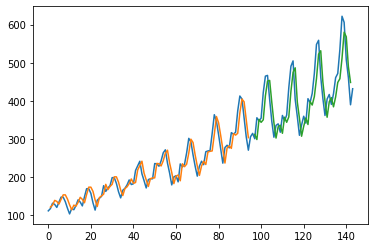

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=4, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Fine-tuning our model to 100 Epoch, and batch size of 4 with 1 neouron gives us a lower RMSE score than what we started with, with :
Train score : 22.79 RMSE
Test score: 47.88 RMSE

#### Diagnostic of 100 Epochs, neouron of 5 and batch size of 4

Epoch 1/100
24/24 - 2s - loss: 0.0535
Epoch 2/100
24/24 - 0s - loss: 0.0407
Epoch 3/100
24/24 - 0s - loss: 0.0303
Epoch 4/100
24/24 - 0s - loss: 0.0229
Epoch 5/100
24/24 - 0s - loss: 0.0184
Epoch 6/100
24/24 - 0s - loss: 0.0158
Epoch 7/100
24/24 - 0s - loss: 0.0144
Epoch 8/100
24/24 - 0s - loss: 0.0139
Epoch 9/100
24/24 - 0s - loss: 0.0133
Epoch 10/100
24/24 - 0s - loss: 0.0129
Epoch 11/100
24/24 - 0s - loss: 0.0125
Epoch 12/100
24/24 - 0s - loss: 0.0121
Epoch 13/100
24/24 - 0s - loss: 0.0117
Epoch 14/100
24/24 - 0s - loss: 0.0112
Epoch 15/100
24/24 - 0s - loss: 0.0108
Epoch 16/100
24/24 - 0s - loss: 0.0103
Epoch 17/100
24/24 - 0s - loss: 0.0099
Epoch 18/100
24/24 - 0s - loss: 0.0093
Epoch 19/100
24/24 - 0s - loss: 0.0089
Epoch 20/100
24/24 - 0s - loss: 0.0084
Epoch 21/100
24/24 - 0s - loss: 0.0080
Epoch 22/100
24/24 - 0s - loss: 0.0075
Epoch 23/100
24/24 - 0s - loss: 0.0070
Epoch 24/100
24/24 - 0s - loss: 0.0066
Epoch 25/100
24/24 - 0s - loss: 0.0062
Epoch 26/100
24/24 - 0s - loss: 0.

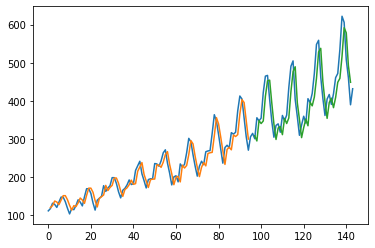

In [48]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=4, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

From fine-tuning the model, the parameters with the lowest RMSE score than our baseline model  is:
Epoch = 100
neouron = 5
batch size = 4
